In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from Code.Evaluation_functions import archetype_correlation,NMI,Ordinal_reconstuction
import os
import itertools
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
all_types=[0,10,9,20,5,14,2,7,18,11,17,6,15,8,19,1,16,3,12]

In [2]:
def plot_types(X,Z,alpha,beta,keys,indexes):
    fig,ax=plt.subplots(figsize=(30,30),sharex=True)
    ax.boxplot(X[:,indexes],labels=keys[indexes],positions=range(0,len(indexes)))
    ax.plot(Z.T[indexes],marker="o",linestyle="-",label=np.arange(1,Z.shape[0]+1))
    ax.legend()
    plt.hlines(beta[1:-1],-1,len(indexes),colors="black",linestyle='dotted')
    plt.yticks(alpha,["Very much like me","Like me","Some-what like me","A Little like me","Not like me","Not like me at all"],rotation=45,fontsize="17")
    
    plt.show()

In [3]:
#Load data
data_all=pd.read_csv(r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\Schmidt_et_al_2021_Latent_profile_analysis_of_human_values_SUPPL\VB_LPA\Data\ESS8_data.csv")
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
data=data_all[keys]

savedir=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\RealData"
K=4
times=3

In [4]:
#load standard model 
files=[f"K{K}_sample{i}OAA_Result" for i in range(times)] #OAA
sumfiles=[f"K{K}_sample{i}OAA_summery" for i in range(times)]
#files=[f"K{K}_sample{i}RB_Result" for i in range(times)] #RB OAA
#sumfiles=[f"K{K}_sample{i}RB_summery" for i in range(times)]

ModelData=[]
Summerys=[]
for file in files:
    with open(os.path.join(savedir,file), "r") as file:
        ModelData.append(json.load(file))

for file in sumfiles:
    with open(os.path.join(savedir,file), "r") as file:
        Summerys.append(json.load(file))

In [280]:
pd.DataFrame([data for data in Summerys])

,loss,Sigma,best_epokes,RunTime
0,797836.927135,0.065622,999,1321.159967
1,800118.842295,0.062093,998,1305.791502
2,797638.729111,0.066308,959,1292.695879


In [5]:
time=3
[(permutation, archetype_correlation(ModelData[permutation[0]]["A"],ModelData[permutation[1]]["A"])[2])
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.8313596472778445),
 ((0, 2), 0.9817572533794279),
 ((1, 0), 0.8213101877344751),
 ((1, 2), 0.8584045359805539),
 ((2, 0), 0.9817572533794278),
 ((2, 1), 0.8584045359805539)]

In [30]:
data_all.keys()

Index(['ID', 'Country', 'left_right', 'immigrants', 'homosexual',
       'Satisfy_life', 'Satisfy_health', 'Attitude2EU', 'gender', 'age',
       'education', 'subjective_income', 'SD1', 'PO1', 'UN1', 'AC1', 'SC1',
       'ST1', 'CO1', 'UN2', 'TR1', 'HD1', 'SD2', 'BE1', 'AC2', 'SC2', 'ST2',
       'CO2', 'PO2', 'BE2', 'UN3', 'TR2', 'HD2', 'TR_CFA', 'CO_CFA', 'SC_CFA',
       'HD_CFA', 'ST_CFA', 'SD_CFA', 'PO_CFA', 'AC_CFA', 'UN_CFA', 'BE_CFA',
       'SBM8', 'SBM9', 'SBM16', 'LCA5', 'LCA8', 'LCA16'],
      dtype='object')

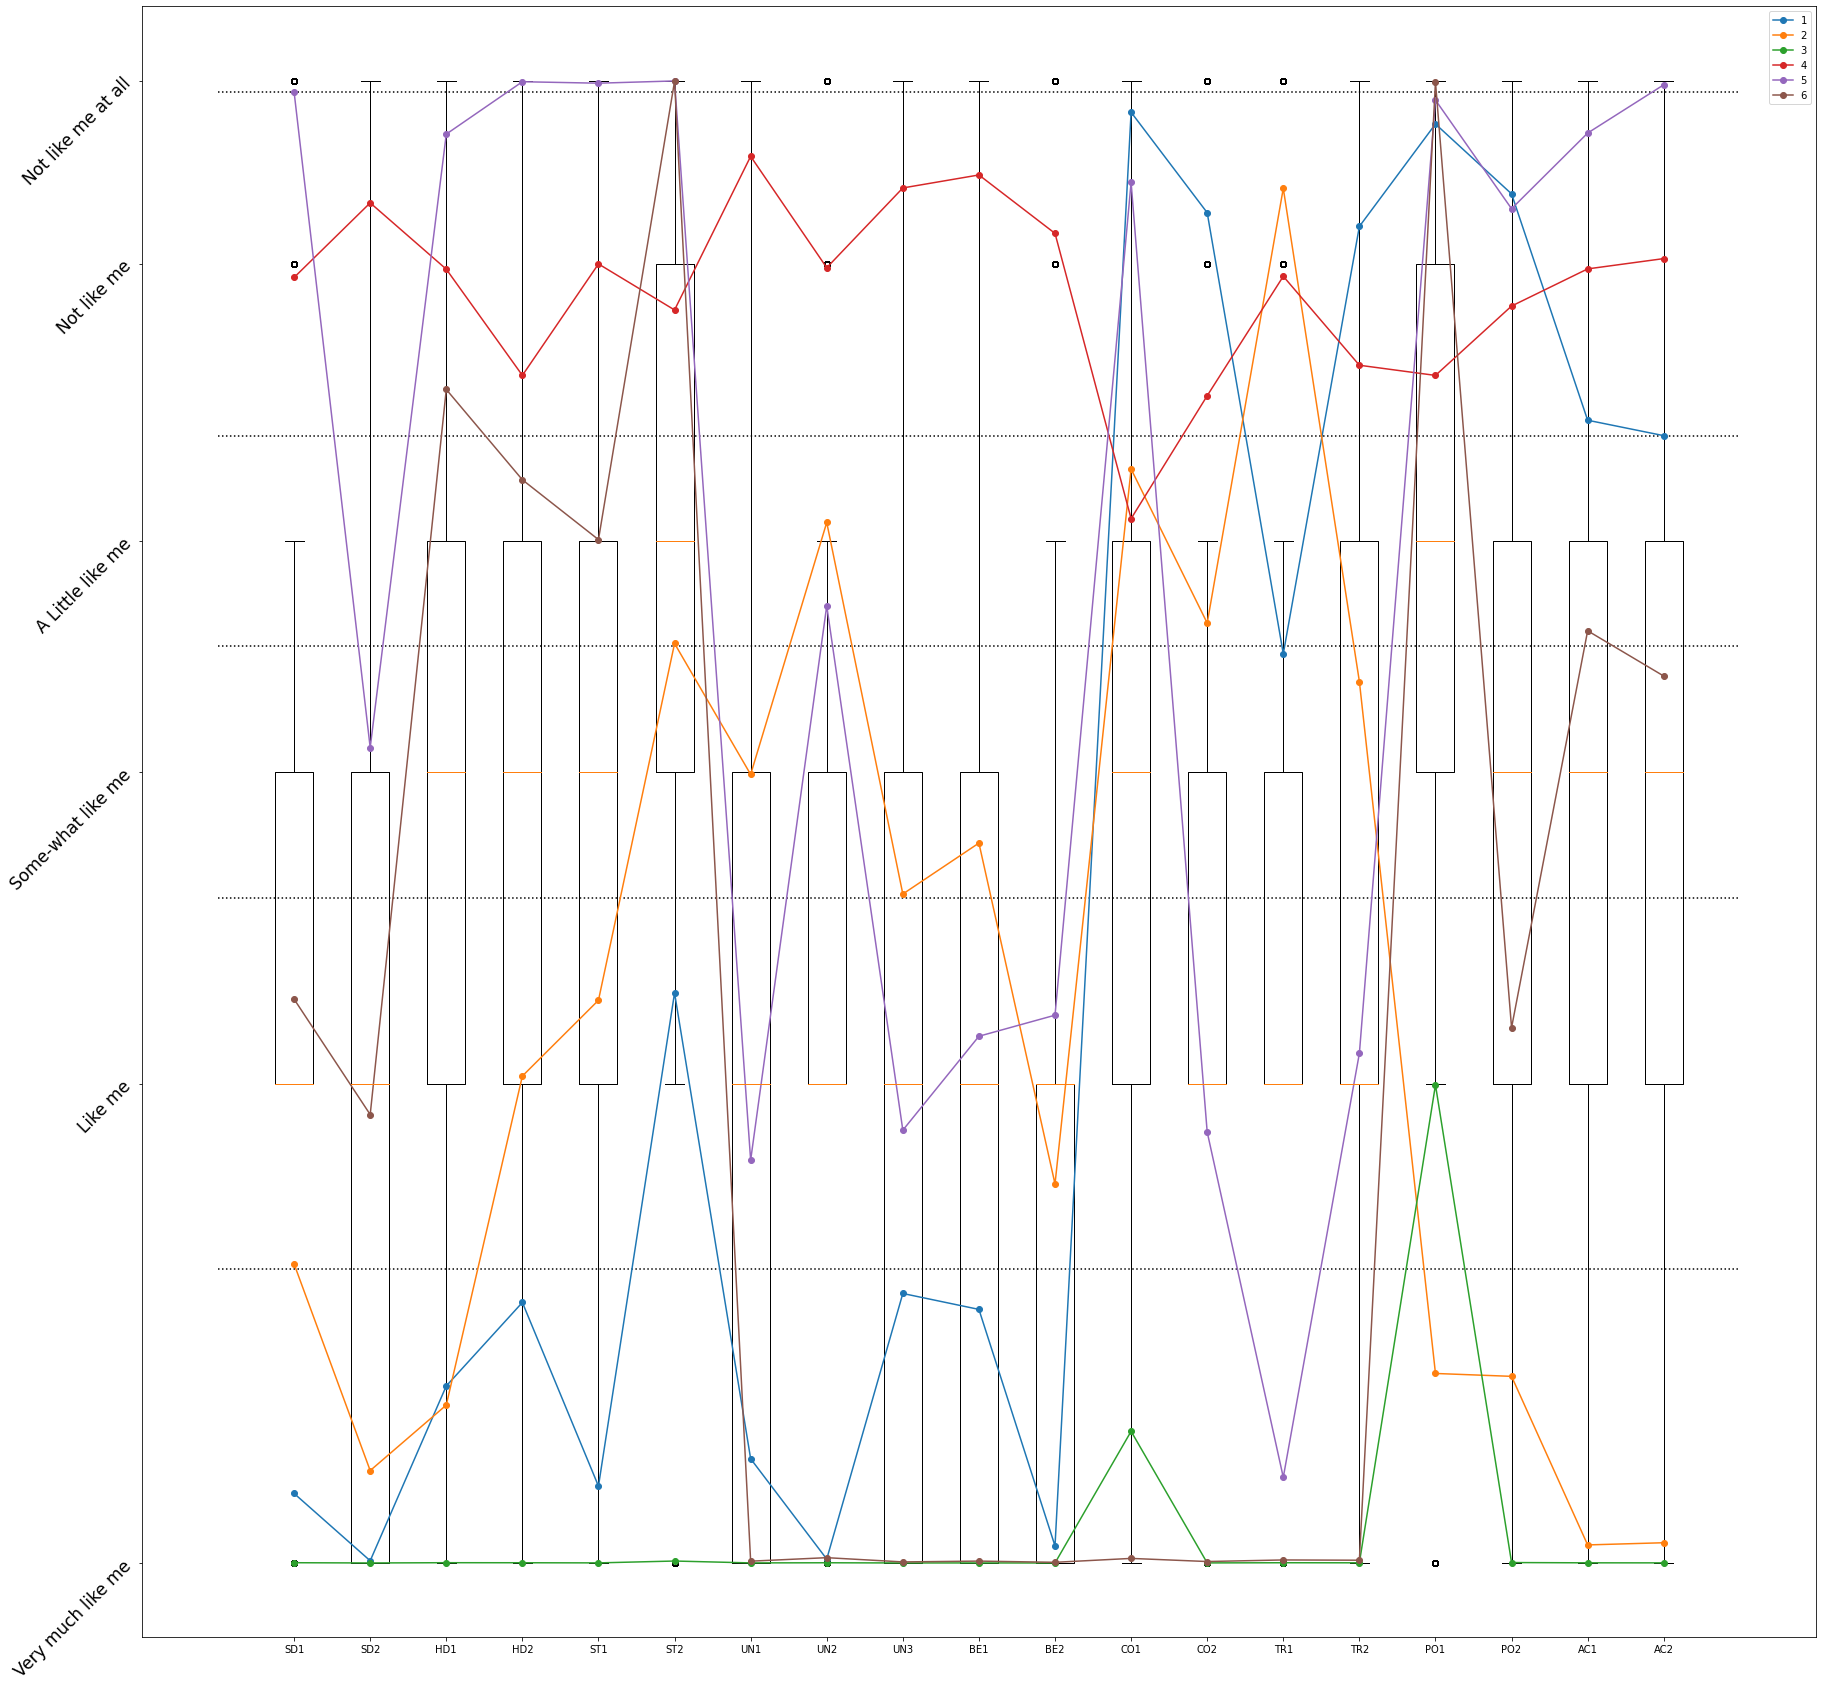

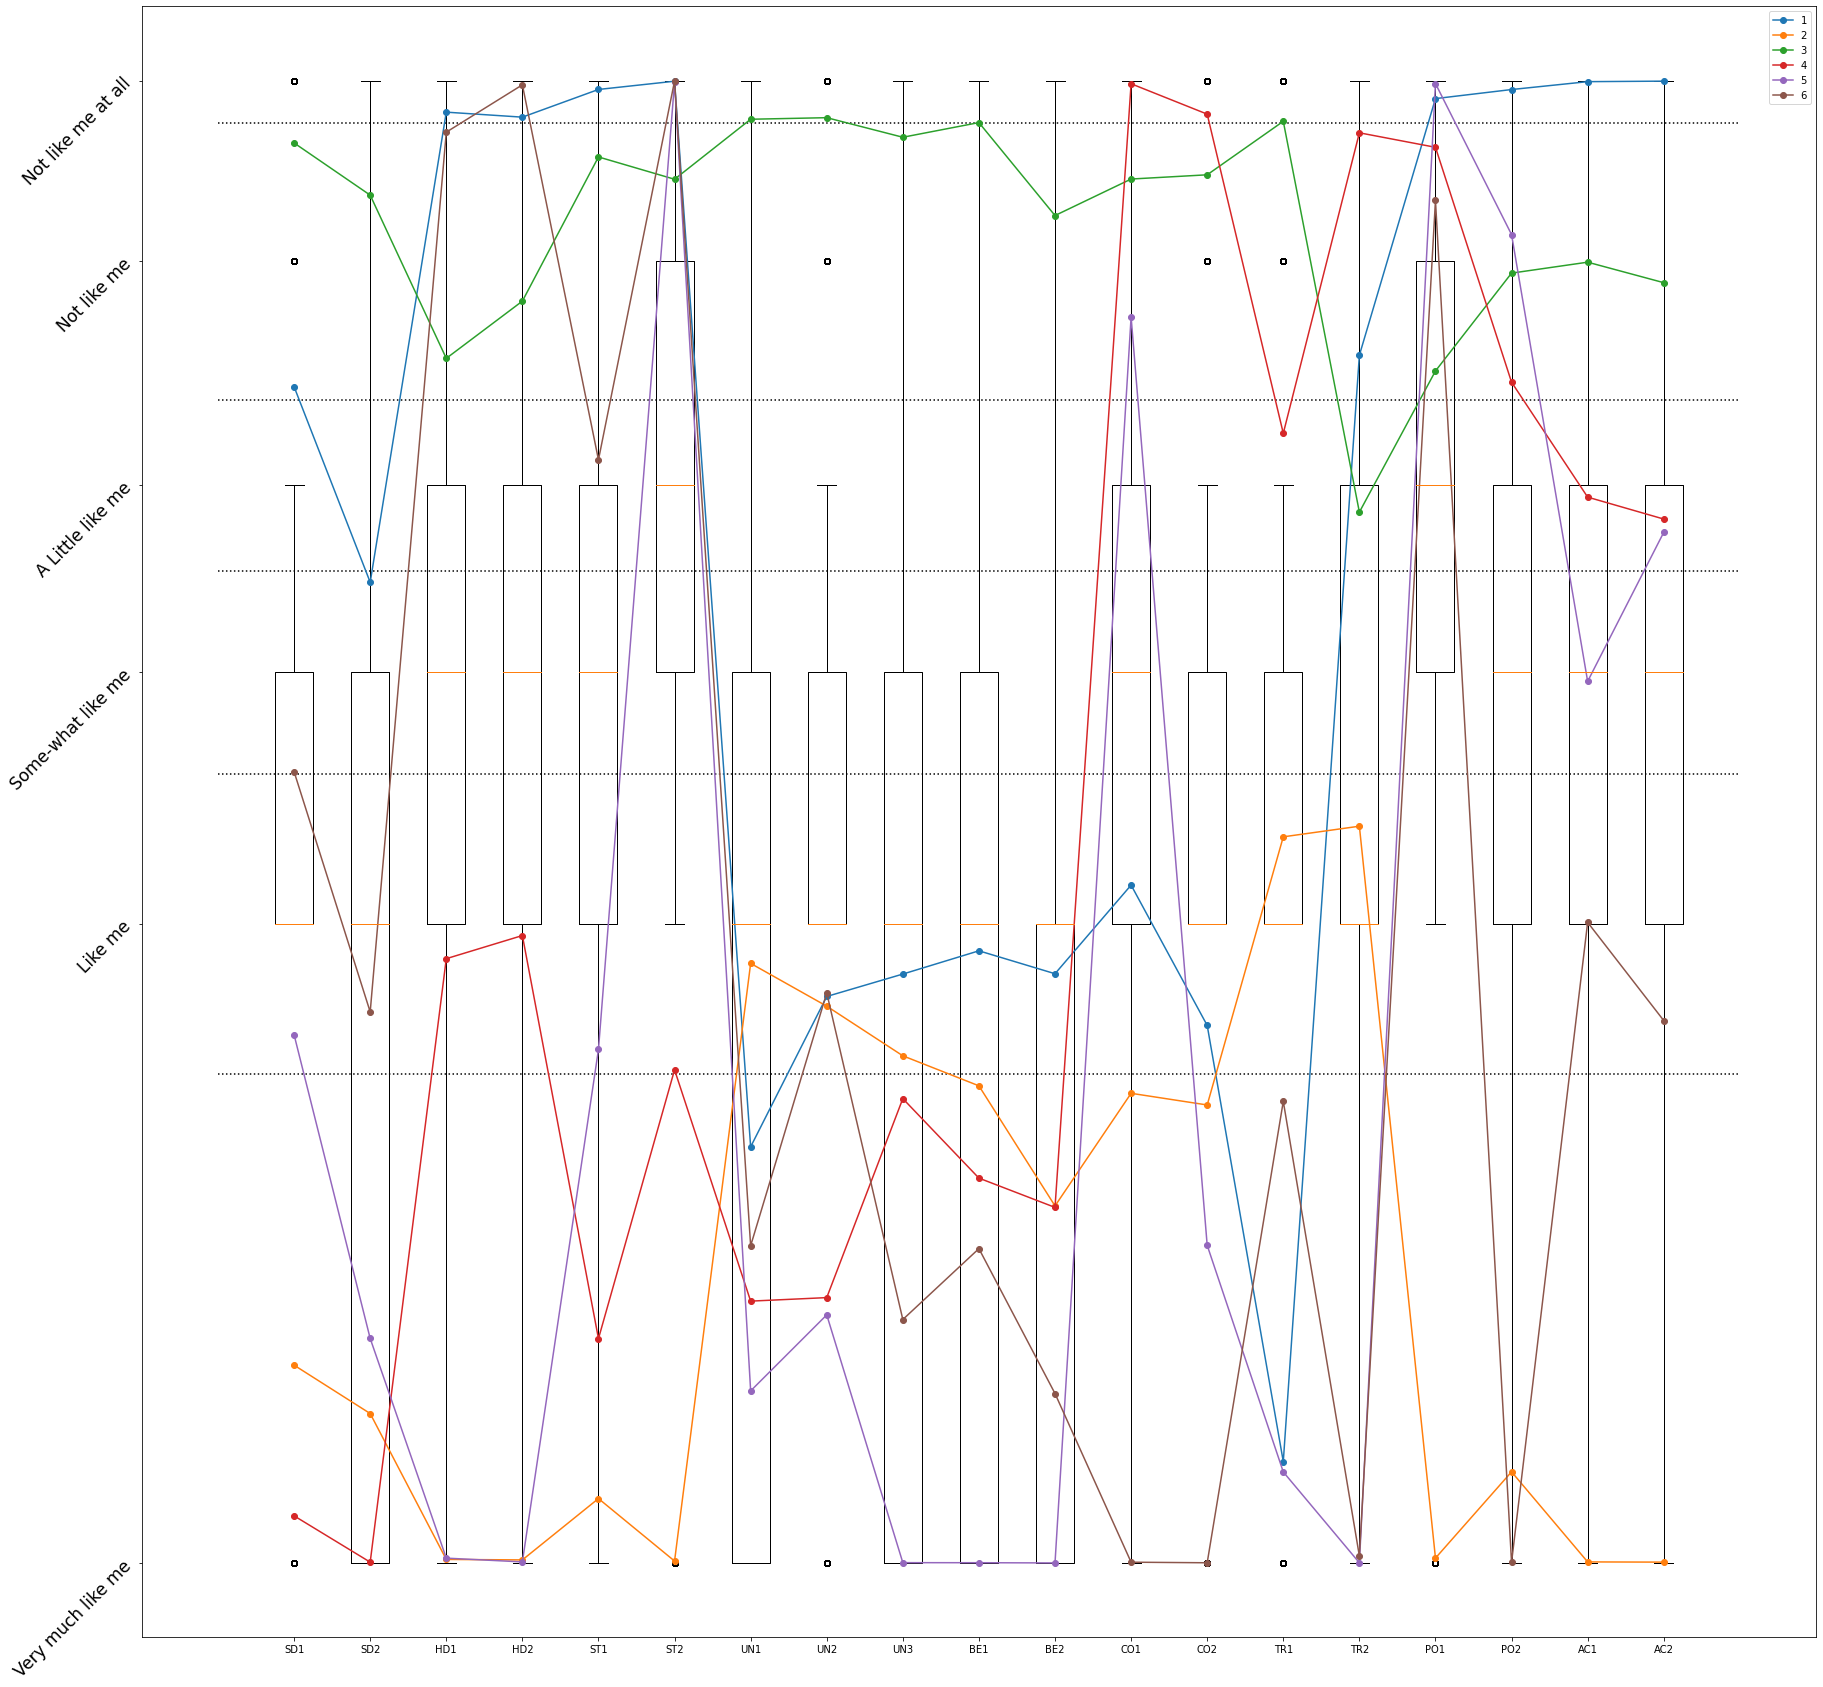

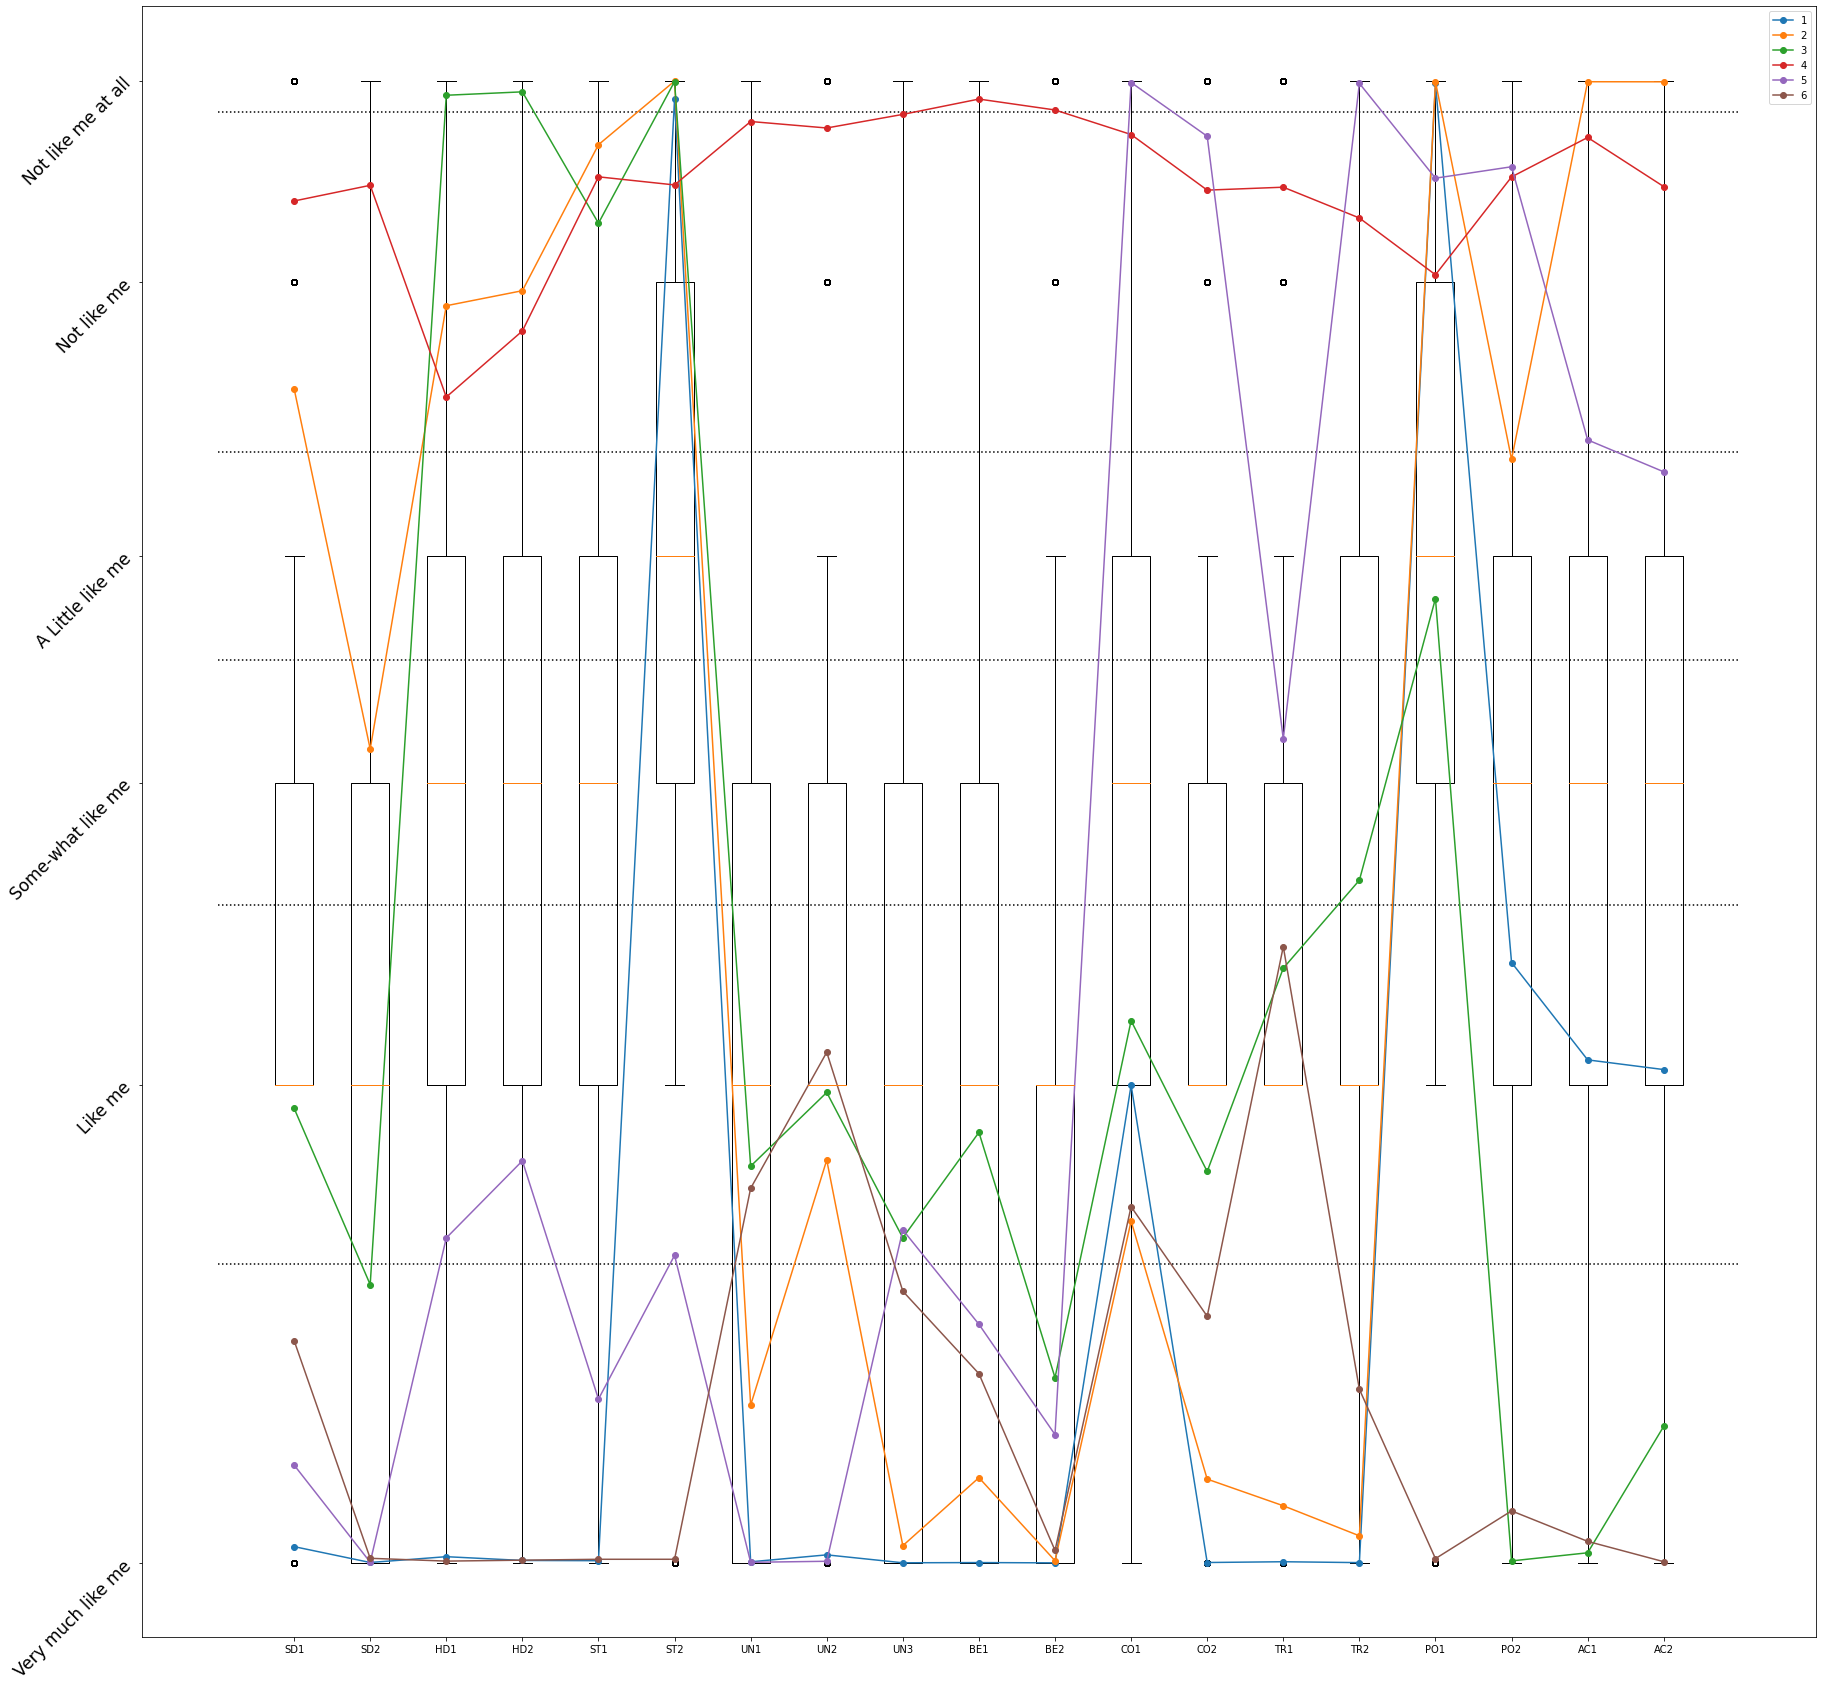

In [22]:
for i in range(3):

    Xhat=np.array(ModelData[i]['Xtilde'])
    A=np.array(ModelData[i]['A'])
    alpha=np.array(ModelData[i]['alpha'])
    beta=np.array(ModelData[i]['beta'])
    plot_types(Xhat,A,alpha,beta,keys,all_types)

In [27]:
data_all.columns

Index(['ID', 'Country', 'left_right', 'immigrants', 'homosexual',
       'Satisfy_life', 'Satisfy_health', 'Attitude2EU', 'gender', 'age',
       'education', 'subjective_income', 'SD1', 'PO1', 'UN1', 'AC1', 'SC1',
       'ST1', 'CO1', 'UN2', 'TR1', 'HD1', 'SD2', 'BE1', 'AC2', 'SC2', 'ST2',
       'CO2', 'PO2', 'BE2', 'UN3', 'TR2', 'HD2', 'TR_CFA', 'CO_CFA', 'SC_CFA',
       'HD_CFA', 'ST_CFA', 'SD_CFA', 'PO_CFA', 'AC_CFA', 'UN_CFA', 'BE_CFA',
       'SBM8', 'SBM9', 'SBM16', 'LCA5', 'LCA8', 'LCA16'],
      dtype='object')

In [6]:
i=2

In [7]:
def plot_atibutes(atributes,Z,alpha,beta,keys,indexes):
    fig,ax=plt.subplots(figsize=(30,30),sharex=True)
    ax.plot(atributes.to_numpy().T[indexes],marker="o",linestyle="-")
    legend1=plt.legend(atributes.index)
    ax.plot(Z.T[indexes],marker="o",linestyle="--",label=np.arange(1,Z.shape[0]+1))
    legend2=plt.legend(loc=4)
    plt.gca().add_artist(legend1)
    plt.hlines(beta[1:-1],-1,len(indexes),colors="black",linestyle='dotted')
    plt.xticks(np.arange(len(indexes)),keys[indexes])
    plt.yticks(alpha,["Very much like me","Like me","Some-what like me","A Little like me","Not like me","Not like me at all"],rotation=45,fontsize="17")
    plt.show()

In [8]:
def make_atribute_DF(X,Data,keys,category,categoryList=None):
    
    if categoryList==None:
        categoryList=data_all[category].unique()
    data_new=pd.DataFrame(index=categoryList,columns=keys)
    for atribute in categoryList:
        idx=data_all[category]==atribute
        data_new.loc[atribute,keys]=X[idx.to_numpy(),:].mean(axis=0)
    return data_new

In [9]:
def make_atribute_DF_split(X,Data,keys,category,categoryList=None):
    
    if categoryList==None:
        categoryList=data_all[category].unique()
    data_new=pd.DataFrame(index=categoryList,columns=keys)
    for atribute in categoryList:
        idx=data_all[category]==atribute
        data_new.loc[atribute,keys]=X[idx.to_numpy(),:].mean(axis=0)
    return data_new

In [10]:
def make_scale_DF(scale,Data,category,categoryList=None):
    
    if categoryList==None:
        categoryList=data_all[category].unique()
    data_new=pd.DataFrame(index=categoryList,columns=np.arange(scale.shape[1]))
    for atribute in categoryList:
        idx=data_all[category]==atribute
        data_new.loc[atribute,:]=scale[idx.to_numpy(),:].mean(axis=0)
    return data_new

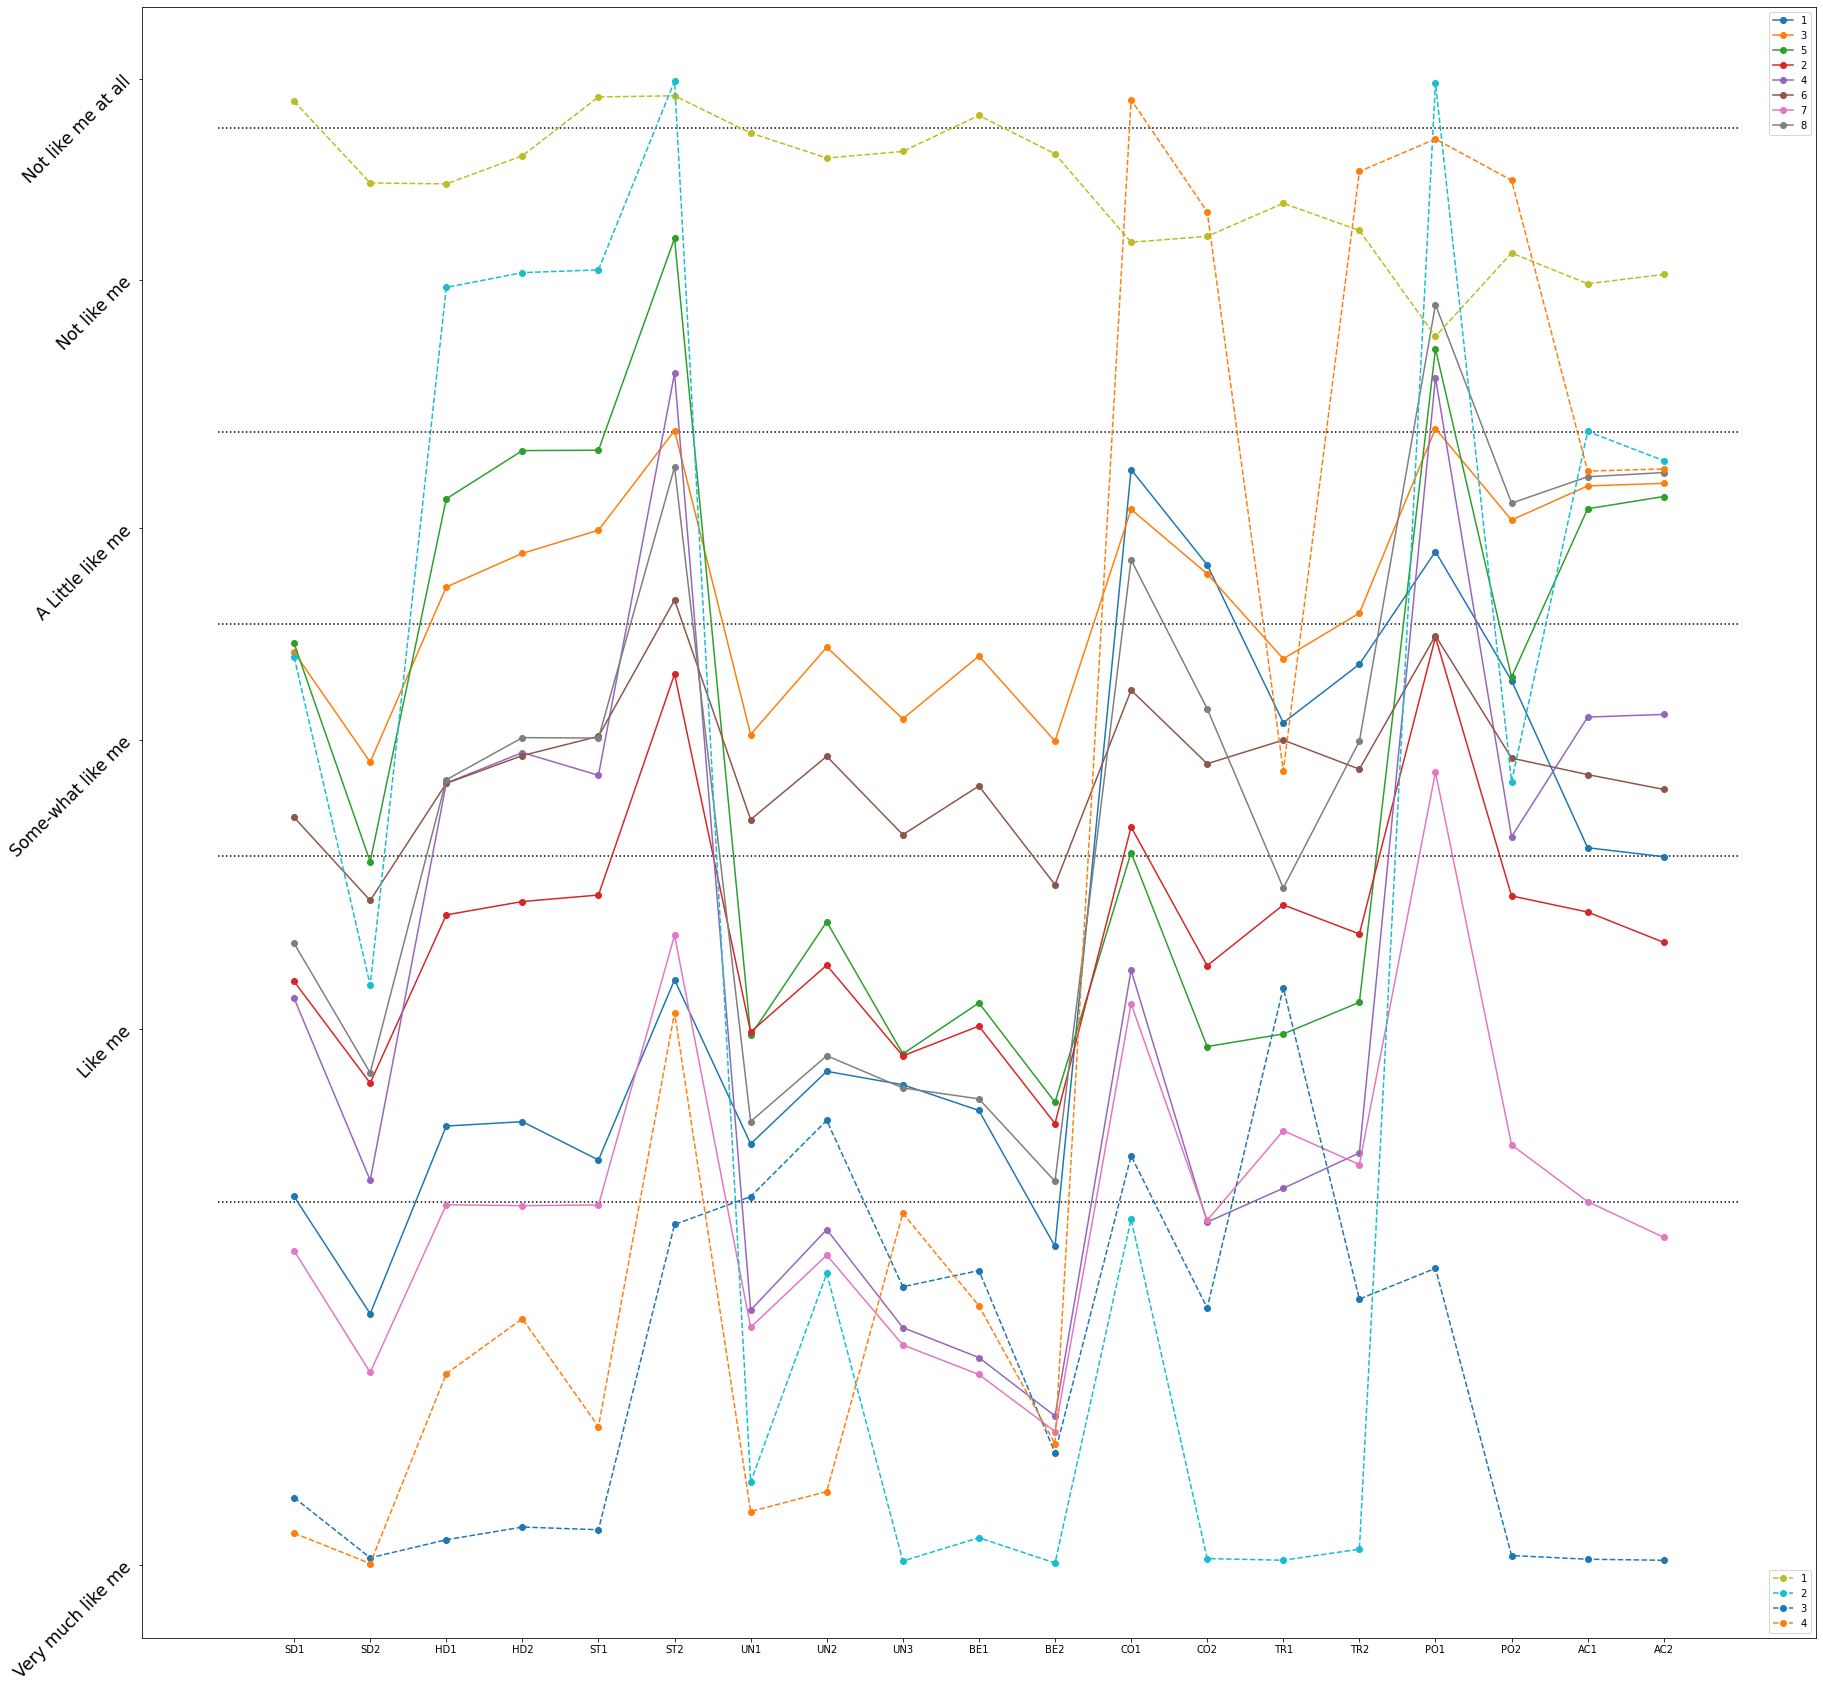

In [11]:
Xhat=np.array(ModelData[i]['Xtilde'])
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha'])
beta=np.array(ModelData[i]['beta'])
at=make_atribute_DF(Xhat,data_all,keys,'SBM8')
plot_atibutes(at,A,alpha,beta,keys,all_types)

In [12]:
a,aMax,_=archetype_correlation(at.to_numpy(dtype="float64"),A)
a

array([[-0.75256489, -0.10420039,  0.2784656 ,  0.95372194],
       [-0.40186656,  0.72481039, -0.05096845,  0.53292993],
       [-0.0372381 ,  0.988281  , -0.25609248, -0.0208397 ],
       [-0.24320389,  0.68764585,  0.30201609,  0.35344727],
       [-0.23467627,  0.93501345, -0.15003602,  0.22000997],
       [-0.10554028,  0.54578533,  0.47149913,  0.30734195],
       [-0.37356432,  0.57408696,  0.34933816,  0.4770442 ],
       [-0.61156865,  0.6410747 , -0.14782625,  0.711535  ]])

In [324]:
np.array(ModelData[i]['S']).mean(1)

array([0.25000001, 0.25      , 0.25000001, ..., 0.24999999, 0.25      ,
       0.25000001])

In [41]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'Attitude2EU')
at

IndexError: tuple index out of range

In [321]:
a.shape

(4, 23)

In [316]:
data[]

In [42]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'gender')
at

IndexError: tuple index out of range

In [260]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'education')
at

,0,1,2,3,4,5,6
7,0.0,0.35016,0.476169,0.549927,0.638735,0.85353,1.0
4,0.0,0.319079,0.468656,0.560341,0.665886,0.86409,1.0
3,0.0,0.328023,0.469117,0.550828,0.649114,0.850959,1.0
2,0.0,0.309081,0.464978,0.551255,0.646872,0.851522,1.0
5,0.0,0.3292,0.468327,0.548522,0.643739,0.855397,1.0
1,0.0,0.316998,0.46359,0.5442,0.620463,0.815158,1.0
6,0.0,0.34369,0.478475,0.556134,0.648409,0.860277,1.0
55,0.0,0.333725,0.463303,0.530886,0.640087,0.853328,1.0
77,0.0,0.289587,0.439882,0.544099,0.659823,0.876063,1.0
88,0.0,0.343546,0.471296,0.552934,0.62358,0.824522,1.0


In [261]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'age')
at

,0,1,2,3,4,5,6
34,0.0,0.333997,0.477261,0.565548,0.662334,0.872083,1.0
52,0.0,0.321576,0.459328,0.541356,0.635292,0.849286,1.0
68,0.0,0.313207,0.454221,0.528213,0.610557,0.824355,1.0
54,0.0,0.326623,0.465152,0.541572,0.634393,0.846755,1.0
20,0.0,0.331388,0.481991,0.586776,0.707997,0.901277,1.0
...,...,...,...,...,...,...,...
92,0.0,0.332858,0.457492,0.515259,0.565855,0.767255,1.0
97,0.0,0.330697,0.58419,0.622337,0.648185,0.756298,1.0
96,0.0,0.46773,0.521653,0.593912,0.753508,0.821322,1.0
99,0.0,0.166738,0.247257,0.388611,0.523398,0.981285,1.0


In [357]:
beta=np.array(ModelData[i]['beta'])
at=make_scale_DF(beta,data_all,'Country')
at

,0,1,2,3,4,5,6
AT,0.0,0.374531,0.494201,0.582744,0.710329,0.865283,1.0
BE,0.0,0.330929,0.503253,0.589792,0.703876,0.890405,1.0
CH,0.0,0.397908,0.515651,0.578096,0.653233,0.86041,1.0
CZ,0.0,0.301921,0.469437,0.596463,0.741319,0.910673,1.0
DE,0.0,0.393068,0.505924,0.558615,0.613044,0.825889,1.0
EE,0.0,0.301531,0.479757,0.552535,0.625958,0.852879,1.0
ES,0.0,0.39745,0.520607,0.575827,0.645997,0.853512,1.0
FI,0.0,0.339654,0.480259,0.558558,0.644425,0.837902,1.0
FR,0.0,0.367089,0.479978,0.534754,0.597635,0.789372,1.0
GB,0.0,0.358541,0.502464,0.5627,0.636524,0.867088,1.0


In [97]:
data_all[data_all.loc[:,'gender']==9]

,ID,Country,left_right,immigrants,homosexual,Satisfy_life,Satisfy_health,Attitude2EU,gender,age,...,PO_CFA,AC_CFA,UN_CFA,BE_CFA,SBM8,SBM9,SBM16,LCA5,LCA8,LCA16
26100,5972,IS,4,5,1,8,2,4,9,24,...,-0.24,0.08,0.66,0.82,1,7,8,5,3,14
26168,6726,IS,5,8,2,10,1,2,9,74,...,-1.03,-0.76,0.25,0.22,8,9,7,2,4,10
26392,9310,IS,10,2,1,8,1,0,9,46,...,-1.01,-1.56,0.51,0.52,4,8,6,3,7,7


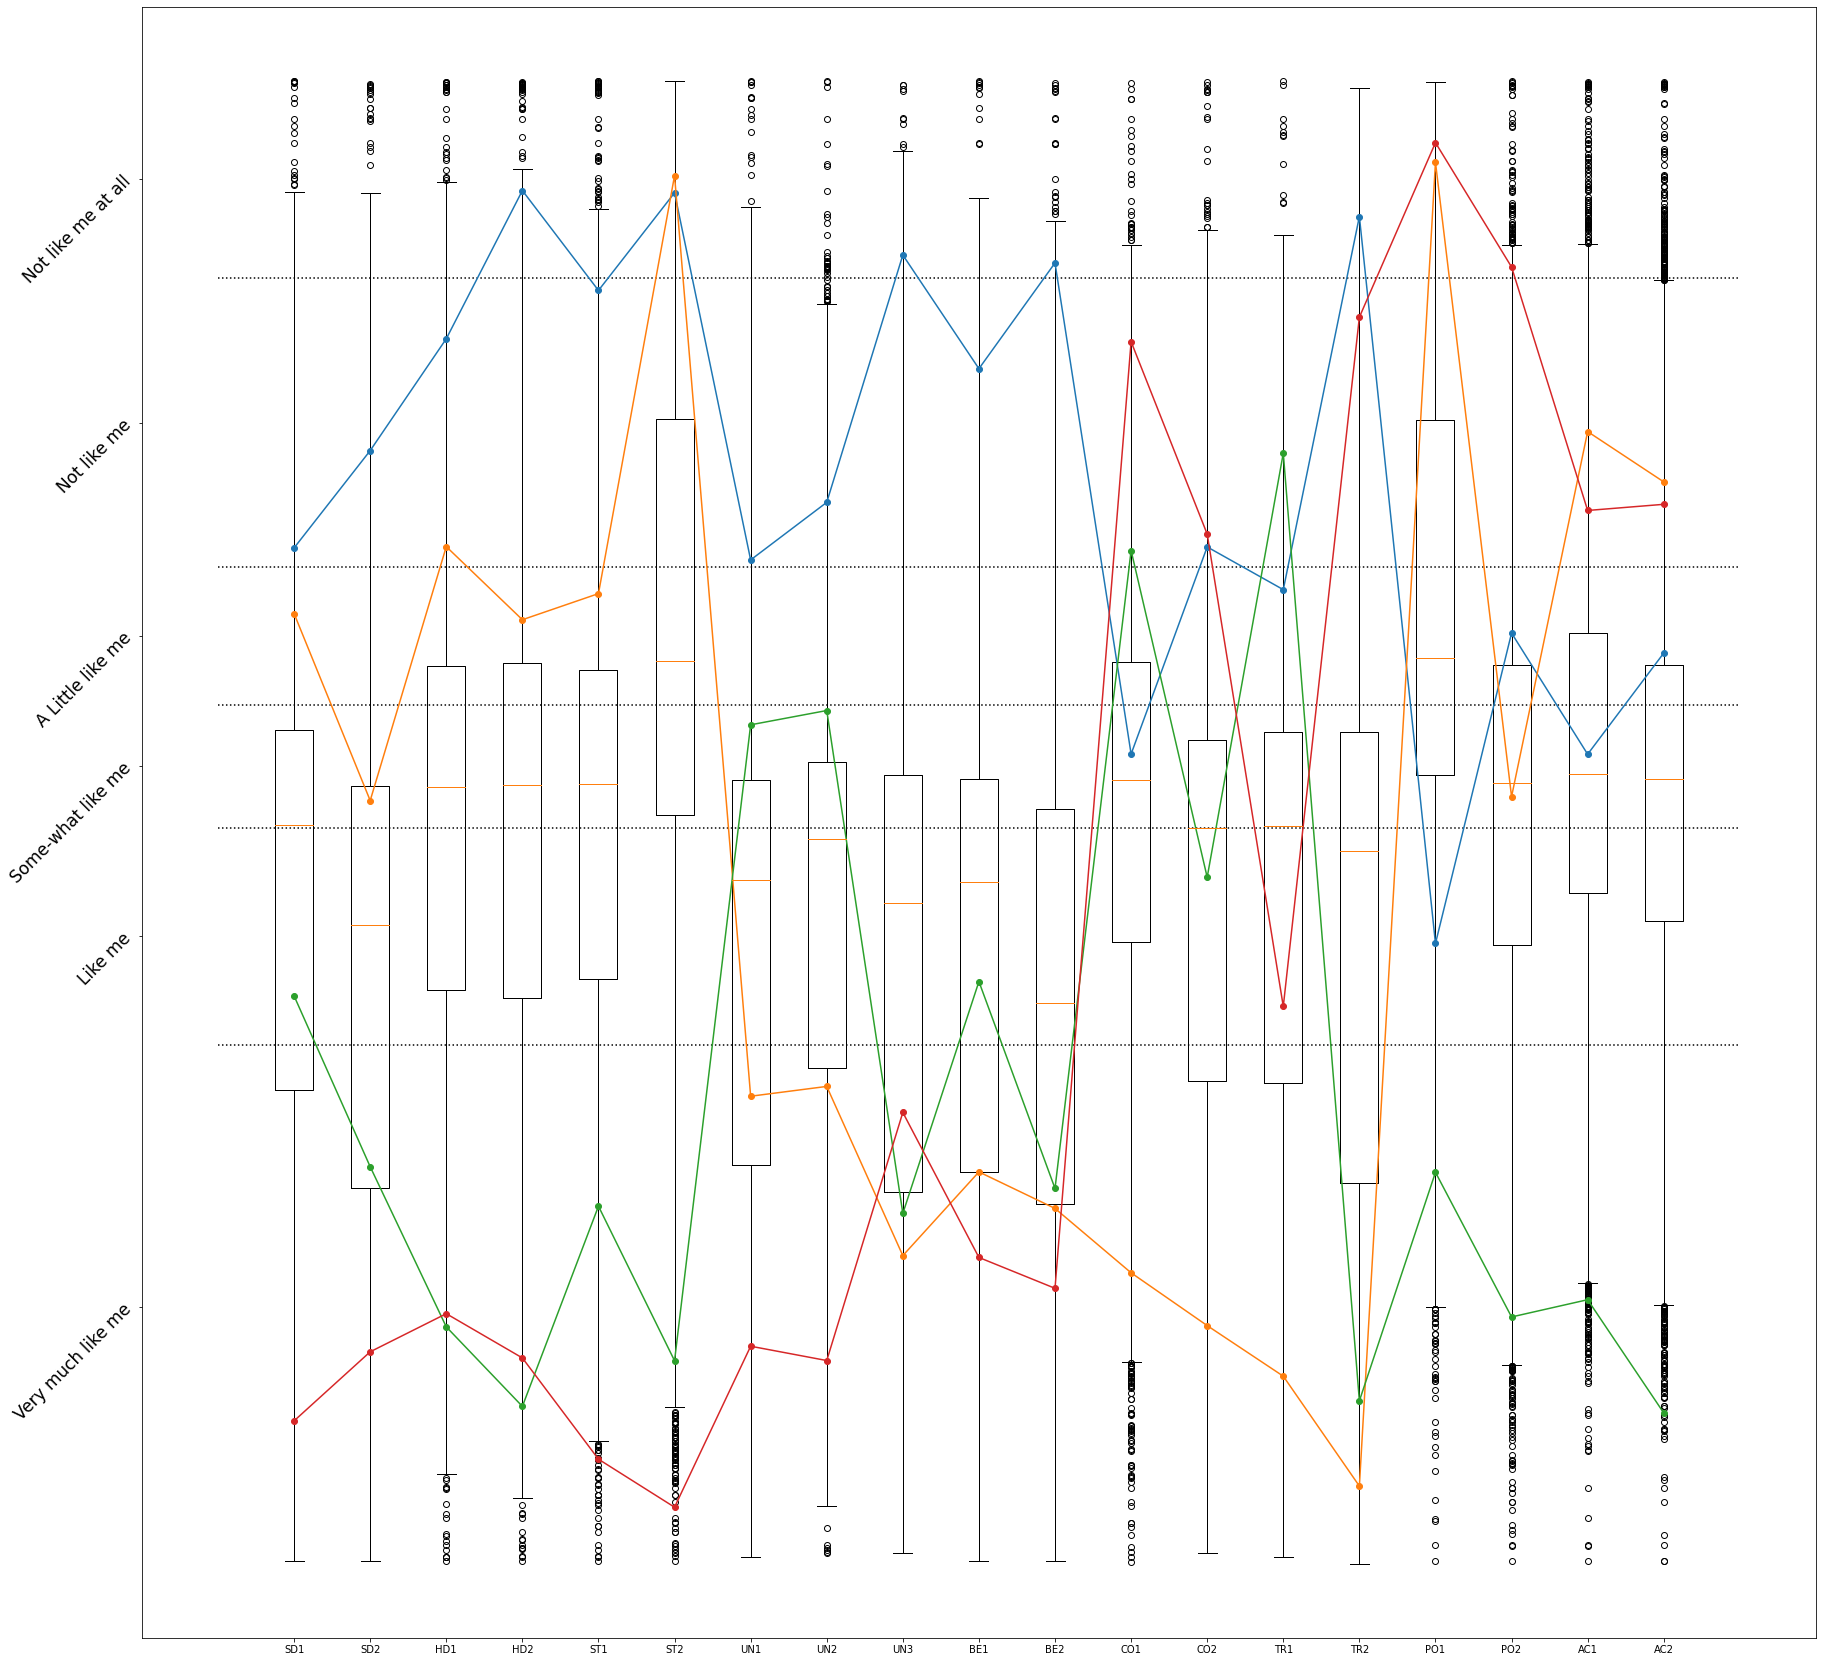

In [283]:
Xhat=np.array(ModelData[i]['Xtilde'])[index]
A=np.array(ModelData[i]['A'])
alpha=np.array(ModelData[i]['alpha']).mean(axis=0)
beta=np.array(ModelData[i]['beta']).mean(axis=0)
plot_types(Xhat,A,alpha,beta,keys,all_types)

In [66]:
np.array(ModelData[i]['beta'])[index].mean(axis=0)

array([0.        , 0.3361505 , 0.47337559, 0.54738096, 0.63654103,
       0.85248939, 0.99999999])

In [67]:
np.array(ModelData[i]['beta']).mean(axis=0)

array([0.        , 0.32712018, 0.46972662, 0.55232247, 0.64743159,
       0.85273704, 0.99999999])

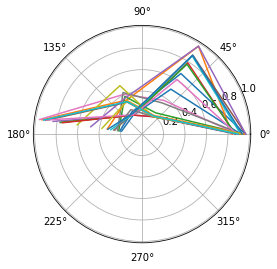

In [17]:
ax = plt.subplot(projection='polar')
r=1
label_loc = np.linspace(start=0, stop=2 * np.pi, num=21)
ax.set_rsticks=(np.arange(21))
ax.plot(lanel_loc,A)
plt.show()